In [106]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sys
import sklearn.preprocessing as pp
import sklearn.decomposition
import sklearn.metrics
import sklearn.svm
import sklearn.model_selection

In [47]:
sys.path.append('C:\\Users\\dfeld\\Documents\\Data Sci Course\\Course Work\\W06 Midterm Project\\src\\modules\\')

In [48]:
import preprocessing_functions

In [138]:
data = pd.read_csv('2019-01 flight data.csv')

In [50]:
data.shape

(638649, 42)

In [139]:
data = data[data['fl_date'] <= '2019-01-07']

In [52]:
# data = data.iloc[0:1000]

In [140]:
y = data['arr_delay']

In [141]:
data = preprocessing_functions.flight_test_features(data, True)

In [142]:
data['arr_delay'] = y

In [56]:
import timeit

In [143]:
start = timeit.timeit()
data = preprocessing_functions.datetime_binning(data, {'h', 'wd', 'w'})
end = timeit.timeit()
print(end - start)

-0.004926400011754595


In [58]:
delay_list = data.columns[data.columns.str.endswith('delay')]

In [144]:
data = preprocessing_functions.process_nan_values(data, features_to_zero=['arr_delay'])

In [147]:
data = preprocessing_functions.daily_flight_order(data)

In [148]:
data

,fl_date,op_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,crs_arr_time,distance,arr_delay,dep_hour,weekday,week,n_previous_flights
0,2019-01-01,G4,215NV,PGD,"Punta Gorda, FL",RFD,"Rockford, IL",810,956,1127,33.0,8,1.0,1.0,0
1,2019-01-01,G4,215NV,RFD,"Rockford, IL",PGD,"Punta Gorda, FL",1041,1422,1127,61.0,10,1.0,1.0,1
2,2019-01-01,G4,216NV,PIE,"St. Petersburg, FL",TOL,"Toledo, OH",823,1046,945,-16.0,8,1.0,1.0,0
3,2019-01-01,G4,216NV,TOL,"Toledo, OH",PIE,"St. Petersburg, FL",1131,1353,945,-19.0,11,1.0,1.0,1
4,2019-01-01,G4,216NV,PIE,"St. Petersburg, FL",GRR,"Grand Rapids, MI",1443,1720,1044,-25.0,14,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146480,2019-01-07,AX,NaN,TVC,"Traverse City, MI",ORD,"Chicago, IL",1140,1205,224,0.0,11,0.0,2.0,0
146481,2019-01-07,UA,NaN,BNA,"Nashville, TN",ORD,"Chicago, IL",1215,1402,409,0.0,12,0.0,2.0,0
146482,2019-01-07,G7,NaN,IND,"Indianapolis, IN",DEN,"Denver, CO",1255,1357,977,0.0,12,0.0,2.0,0
146483,2019-01-07,AX,NaN,DEN,"Denver, CO",GUC,"Gunnison, CO",1510,1622,152,0.0,15,0.0,2.0,0


In [248]:
airline_stats = data[['op_unique_carrier', 'arr_delay']].groupby('op_unique_carrier').mean()

In [249]:
origin_airport_stats = data[['origin', 'arr_delay']].groupby('origin').mean()

In [250]:
dest_airport_stats = data[['dest', 'arr_delay']].groupby('dest').mean()

In [303]:
airplane_stats = data[['tail_num', 'arr_delay']].groupby('tail_num').mean()

In [377]:
num, cat = preprocessing_functions.numerical_categorical_split(data)

In [378]:
num['origin'] = cat['origin']
num['dest'] = cat['dest']
num['op_unique_carrier'] = cat['op_unique_carrier']
num['tail_num'] = cat['tail_num']

<ipython-input-378-cd7bf3de3cf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['origin'] = cat['origin']
<ipython-input-378-cd7bf3de3cf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['dest'] = cat['dest']
<ipython-input-378-cd7bf3de3cf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [379]:
num = num.dropna()

In [380]:
# num = num.join(pd.get_dummies(num['op_unique_carrier'], prefix='carrier'), on = num.index).join(pd.get_dummies(num['origin'], prefix='origin'), on = num.index) #.join(pd.get_dummies(num['dest'], prefix='dest'), on = num.index)

In [381]:
num['origin_mean_delay'] = list(origin_airport_stats.loc[num['origin'], 'arr_delay'])
num['dest_mean_delay'] = list(dest_airport_stats.loc[num['dest'], 'arr_delay'])
num['carrier_mean_delay'] = list(airline_stats.loc[num['op_unique_carrier'], 'arr_delay'])
num['plane_mean_delay'] = list(airplane_stats.loc[num['tail_num'], 'arr_delay'])

In [382]:
num

,crs_dep_time,crs_arr_time,distance,arr_delay,dep_hour,weekday,week,n_previous_flights,origin,dest,op_unique_carrier,tail_num,origin_mean_delay,dest_mean_delay,carrier_mean_delay,plane_mean_delay
0,810,956,1127,33.0,8,1.0,1.0,0,PGD,RFD,G4,215NV,2.950820,6.333333,11.213221,-6.909091
1,1041,1422,1127,61.0,10,1.0,1.0,1,RFD,PGD,G4,215NV,10.666667,8.040984,11.213221,-6.909091
2,823,1046,945,-16.0,8,1.0,1.0,0,PIE,TOL,G4,216NV,-8.527273,1.071429,11.213221,13.916667
3,1131,1353,945,-19.0,11,1.0,1.0,1,TOL,PIE,G4,216NV,9.023256,-1.084848,11.213221,13.916667
4,1443,1720,1044,-25.0,14,1.0,1.0,2,PIE,GRR,G4,216NV,-8.527273,4.868020,11.213221,13.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146464,919,1055,526,-6.0,9,0.0,2.0,1,ATL,PIT,DL,N999DN,-3.886114,0.831591,-8.649771,-11.794118
146465,1139,1328,526,-17.0,11,0.0,2.0,2,PIT,ATL,DL,N999DN,-5.802784,-4.826145,-8.649771,-11.794118
146466,1425,1501,453,-15.0,14,0.0,2.0,3,ATL,LIT,DL,N999DN,-3.886114,6.275472,-8.649771,-11.794118
146467,1545,1816,453,-10.0,15,0.0,2.0,4,LIT,ATL,DL,N999DN,3.003774,-4.826145,-8.649771,-11.794118


In [383]:
num = num.drop(['origin', 'dest', 'op_unique_carrier', 'tail_num'], axis=1)

In [384]:
# num = num.drop(['distance'], axis=1)

In [385]:
num['distance'] = sklearn.preprocessing.minmax_scale(num['distance'])
num['dep_hour'] = sklearn.preprocessing.minmax_scale(num['dep_hour'])

In [386]:
# num.dep_hour /= 10

In [387]:
num = num.drop(['crs_dep_time', 'crs_arr_time'], axis=1)

In [388]:
num = num.drop(num[(num['arr_delay'] >= 2 * num['arr_delay'].std() + num['arr_delay'].mean()) & (num['arr_delay'] <= -1 * num['arr_delay'].std() + num['arr_delay'].mean())].index)

In [389]:
num_std = num['arr_delay'].std()

In [390]:
num['arr_delay'] /= num_std
num['origin_mean_delay'] /= num_std
num['dest_mean_delay'] /= num_std
num['carrier_mean_delay'] /= num_std
num['plane_mean_delay'] /= num_std

In [391]:
num['arr_delay'].describe()

count    146357.000000
mean          0.067264
std           1.000000
min          -1.591402
25%          -0.335032
50%          -0.125637
75%           0.167516
max          35.743716
Name: arr_delay, dtype: float64

array([[<AxesSubplot:title={'center':'arr_delay'}>]], dtype=object)

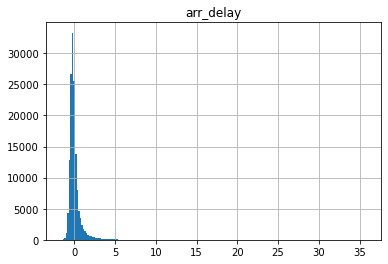

In [393]:
num.hist('arr_delay', bins=200)

In [394]:
y = num['arr_delay']
X = num.drop(['arr_delay'], axis = 1)

In [325]:
X

,distance,dep_hour,weekday,week,n_previous_flights,origin_mean_delay,dest_mean_delay,carrier_mean_delay,plane_mean_delay
0,0.221325,0.8,1.0,1.0,0,0.111826,0.240011,0.424942,-0.261830
1,0.221325,1.0,1.0,1.0,1,0.404229,0.304725,0.424942,-0.261830
2,0.184572,0.8,1.0,1.0,0,-0.323154,0.040603,0.424942,0.527393
3,0.184572,1.1,1.0,1.0,1,0.341950,-0.041112,0.424942,0.527393
4,0.204564,1.4,1.0,1.0,2,-0.323154,0.184481,0.424942,0.527393
...,...,...,...,...,...,...,...,...,...
146464,0.099960,0.9,0.0,2.0,1,-0.147270,0.031514,-0.327796,-0.446956
146465,0.099960,1.1,0.0,2.0,2,-0.219905,-0.182894,-0.327796,-0.446956
146466,0.085218,1.4,0.0,2.0,3,-0.147270,0.237818,-0.327796,-0.446956
146467,0.085218,1.5,0.0,2.0,4,0.113832,-0.182894,-0.327796,-0.446956


In [25]:
kfold = sklearn.model_selection.KFold(shuffle = True, random_state=99)

In [395]:
X = X.to_numpy()
y = y.to_numpy()

In [396]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=99, test_size=0.2)

In [235]:
X_33, X_67, y_33, y_67 = sklearn.model_selection.train_test_split(X, y, random_state=99, test_size=0.67)

In [236]:
pca = sklearn.decomposition.PCA(n_components=7)
X_reduced = pca.fit_transform(X_33)

In [237]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_33,y_33,random_state=99, test_size=0.2)

In [238]:
X_pca_train, X_pca_test, y_train, y_test = sklearn.model_selection.train_test_split(X_reduced,y_33,random_state=99, test_size=0.2)

In [397]:
svm_regressor = sklearn.svm.SVR()

In [398]:
svm_regressor.fit(X_train, y_train)

SVR()

In [ ]:
for train_index, test_index in kfold.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
scores = sklearn.model_selection.cross_val_score(estimator=sklearn.svm.SVC(), X = X, y = y, cv = kfold)

In [399]:
y_pred = svm_regressor.predict(X_test)

0    0.280615
dtype: float64

In [400]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

0.8658744278896087

In [85]:
X_hp_train, X_hp_test, y_hp_train, y_hp_test = sklearn.model_selection.train_test_split(X_33,y_33,random_state=99, test_size=0.5)

In [86]:
hyperparams = [{'C': [0.1, 1.0, 10], 'kernel': ['rbf', 'poly'], 'degree': [3,4,5]}]

In [88]:
grid = sklearn.model_selection.GridSearchCV(estimator=sklearn.svm.SVC(), param_grid=hyperparams, n_jobs=-1)

In [89]:
grid.fit(X_hp_train, y_hp_train)

C:\Users\dfeld\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1.0, 10], 'degree': [3, 4, 5],
                          'kernel': ['rbf', 'poly']}])

In [90]:
grid.best_params_

{'C': 1.0, 'degree': 3, 'kernel': 'rbf'}

In [94]:
pd.DataFrame(y_pred).value_counts()

-9.0     2925
 0.0     2374
-11.0    1358
-8.0     1047
-10.0     615
-12.0     463
-5.0      277
-16.0     136
-14.0     116
-6.0      101
-13.0      41
-7.0       37
-17.0      28
-18.0       9
-15.0       1
-4.0        1
dtype: int64

In [99]:
pd.DataFrame(y_test)[pd.DataFrame(y_test)[0] > 0].value_counts()

1.0      169
2.0      164
3.0      143
4.0      139
5.0      125
        ... 
107.0      1
137.0      1
141.0      1
142.0      1
130.0      1
Length: 142, dtype: int64

array([[<AxesSubplot:title={'center':'arr_delay'}>]], dtype=object)

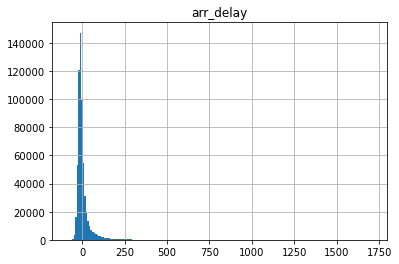

In [105]:
data_raw.hist('arr_delay', bins=200)

In [243]:
svm_pca = sklearn.svm.SVR()
svm_pca.fit(X_pca_train, y_train)
y_pred_pca = svm_pca.predict(X_pca_test)

In [244]:
sklearn.metrics.mean_squared_error(y_pred_pca, y_test)

0.9904468598222458

In [113]:
y_pred_pca

array([-9., -4.,  0., ...,  0., -9., -9.])

In [192]:
pd.DataFrame(y_pred_pca)[pd.DataFrame(y_pred_pca)[0] > 0].count()

0    1375
dtype: int64

In [117]:
pd.DataFrame(y_pred_pca)[0].value_counts()

-9.0     3328
 0.0     3154
-11.0     865
-8.0      518
-16.0     394
-5.0      364
-12.0     263
-17.0     203
-4.0      133
-10.0      90
-6.0       71
-14.0      57
-13.0      46
-7.0       26
-15.0      16
-18.0       1
Name: 0, dtype: int64

In [124]:
delayed = num[num['arr_delay'] > 0]

In [125]:
y_delayed = delayed['arr_delay']
X_delayed = delayed.drop(['arr_delay'], axis = 1)

In [128]:
X_delayed = X_delayed.to_numpy()
y_delayed = y_delayed.to_numpy()

In [129]:
X_delayed = pca.fit_transform(X_delayed)

In [131]:
X_delayed_train, X_delayed_test, y_delayed_train, y_delayed_test = sklearn.model_selection.train_test_split(X_delayed, y_delayed, test_size=0.8, random_state=99)

In [132]:
svm_delayed = sklearn.svm.SVC()

In [133]:
svm_delayed.fit(X_delayed_train, y_delayed_train)
y_pred_delayed = svm_delayed.predict(X_delayed_test)

In [134]:
sklearn.metrics.mean_squared_error(y_delayed_test, y_pred_delayed)

1374.9377033346889

In [136]:
pd.DataFrame(y_pred_delayed)[0].value_counts()

1.0    24856
3.0    10921
4.0     1795
2.0     1344
5.0      153
6.0      141
7.0      134
Name: 0, dtype: int64

In [137]:
pd.DataFrame(y_delayed_test)[0].value_counts()

1.0      2010
2.0      1853
3.0      1787
4.0      1577
5.0      1547
         ... 
143.0      24
134.0      23
141.0      19
129.0      19
142.0      17
Name: 0, Length: 143, dtype: int64